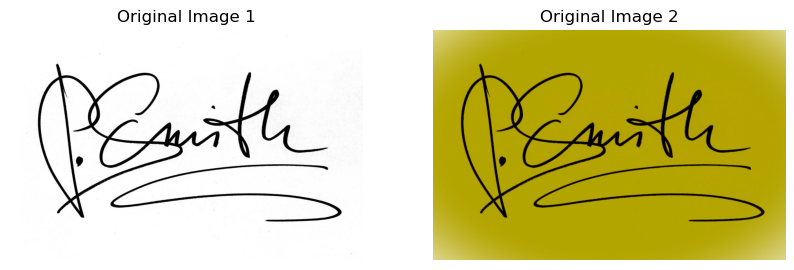

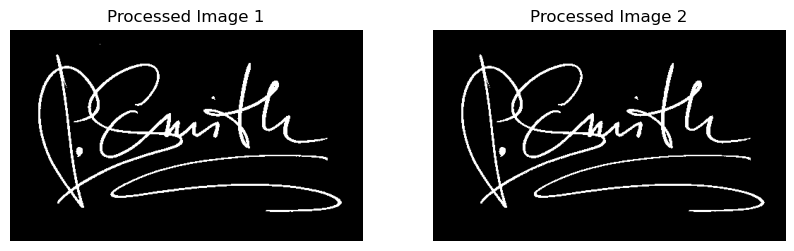

Signature verified. Similarity score: 0.99


In [30]:
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def resize_image(image, width, height):
    # Resize the image while maintaining aspect ratio
    aspect_ratio = width / float(image.shape[1])
    resized = cv2.resize(image, (width, int(image.shape[0] * aspect_ratio)))

    # Crop or pad the image to match the desired dimensions
    if resized.shape[0] > height:
        crop_top = int((resized.shape[0] - height) / 2)
        crop_bottom = crop_top + height
        resized = resized[crop_top:crop_bottom, :]
    else:
        pad_top = int((height - resized.shape[0]) / 2)
        pad_bottom = height - resized.shape[0] - pad_top
        resized = cv2.copyMakeBorder(resized, pad_top, pad_bottom, 0, 0, cv2.BORDER_CONSTANT, value=255)

    return resized

def preprocess_image(image):
    # Apply image thresholding to remove the background
    _, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresholded

def verify_signature(image1_path, image2_path):
    # Load the images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Convert the images to grayscale
    image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Resize the images to a predefined size
    resized_height = 300
    resized_width = 500
    image1_resized = resize_image(image1_gray, resized_width, resized_height)
    image2_resized = resize_image(image2_gray, resized_width, resized_height)

    # Preprocess the images to remove the background
    image1_processed = preprocess_image(image1_resized)
    image2_processed = preprocess_image(image2_resized)

    # Calculate the SSIM index
    ssim_score = ssim(image1_processed, image2_processed)

    # Display the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image 1')
    axes[0].axis('off')
    axes[1].imshow(image2)
    axes[1].set_title('Original Image 2')
    axes[1].axis('off')
    plt.show()
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image1_processed, cmap='gray')
    axes[0].set_title('Processed Image 1')
    axes[0].axis('off')
    axes[1].imshow(image2_processed, cmap='gray')
    axes[1].set_title('Processed Image 2')
    axes[1].axis('off')
    plt.show()

    # Threshold for similarity score
    similarity_threshold = 0.90

    # Compare the SSIM score with the threshold
    if ssim_score >= similarity_threshold:
        print("Signature verified. Similarity score: {:.2f}".format(ssim_score))
        return True
    else:
        print("Signature not verified. Similarity score: {:.2f}".format(ssim_score))
        return False

# Provide the paths to the images
image1_path = "signature1.jpg"
image2_path = "signature3.jpg"

# Verify the signature
result = verify_signature(image1_path, image2_path)
